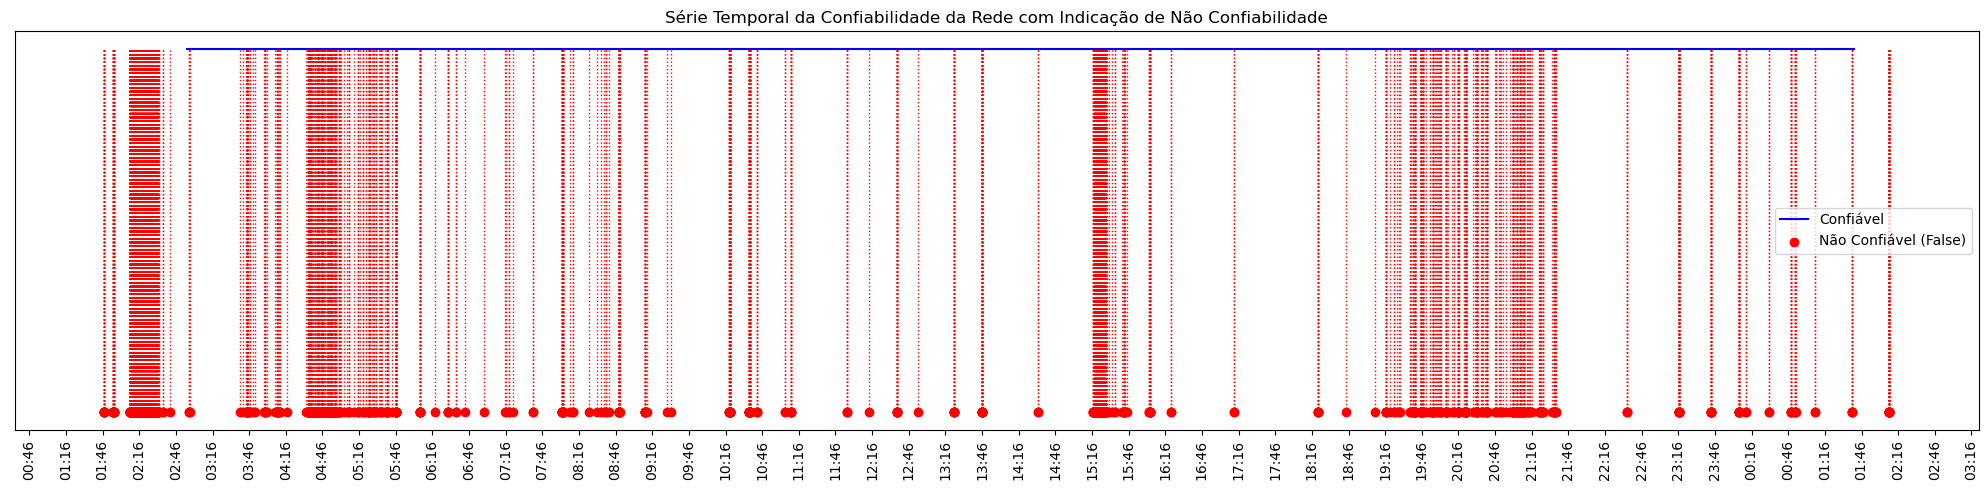

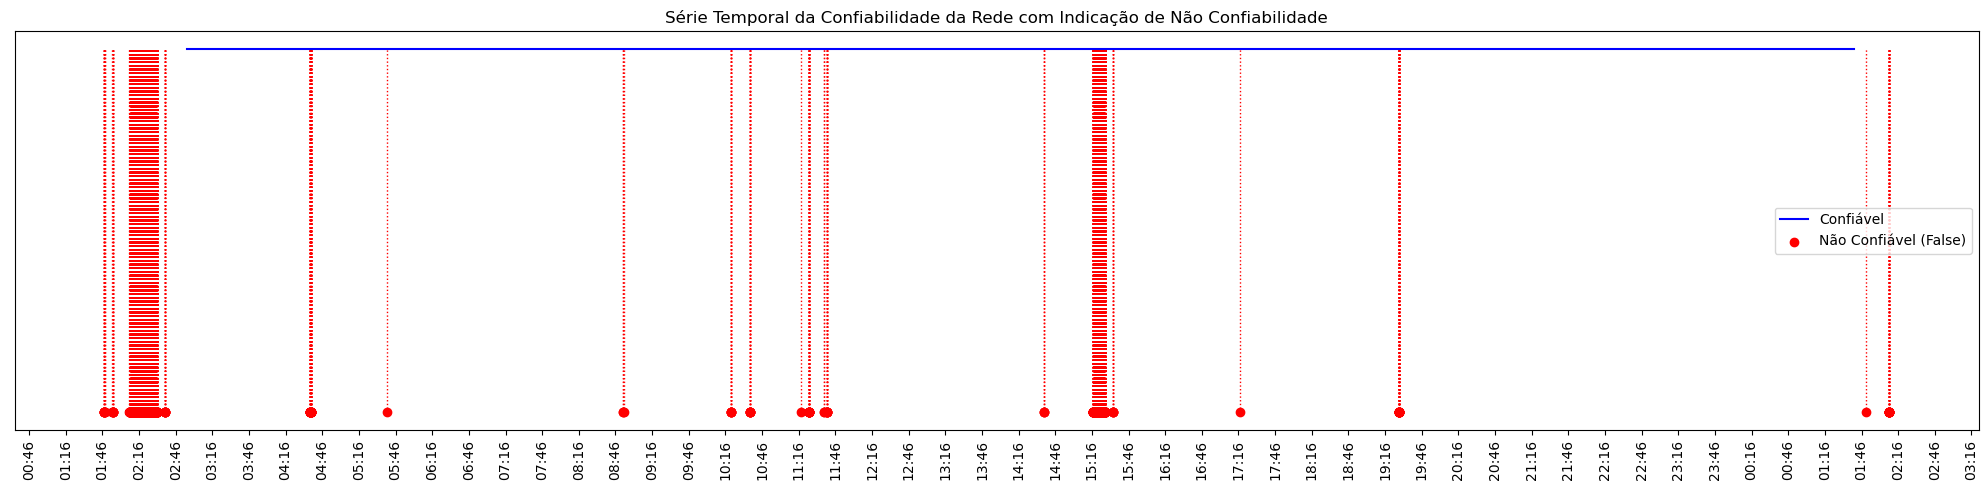

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def gerar_grafico_confianca(caminho_csv):
    df_image = pd.read_csv(caminho_csv, sep=';', names=['trust', 'datetime'], skiprows=1)

    # Converter os milissegundos para datetime
    df_image['datetime'] = pd.to_datetime(df_image['datetime'], unit='ms')

    # Reamostrar os dados para intervalos de 15 minutos, preenchendo os dados para os minutos sem registros com o último valor válido
    df_image.set_index('datetime', inplace=True)
    df_resampled_15 = df_image['trust'].resample('35T').ffill()

    # Identificar os pontos de mudança como 'False' onde o valor de 'trust' é 100
    df_image['status'] = df_image['trust'].apply(lambda x: 'False' if x == 100 else 'True')

    # Filtrar os pontos onde o status é 'False'
    df_false_points = df_image[df_image['status'] == 'False']

    # Criar um dataframe apenas com os pontos confiáveis
    df_confiable = df_resampled_15.copy()
    df_confiable[df_resampled_15 == 100] = None  # Substituir não confiáveis por NaN

    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(20, 5))

    # Desenhar a linha do tempo para confiabilidade, omitindo os pontos não confiáveis
    ax.plot(df_confiable.index, df_confiable, label='Confiável', color='blue')

    # Marcar os pontos de não confiabilidade com um ponto vermelho
    ax.scatter(df_false_points.index, df_false_points['trust'], color='red', label='Não Confiável (False)', zorder=5)

    # Para cada ponto não confiável, desenhar uma linha pontilhada vertical até a linha reta confiável
    for time in df_false_points.index:
        ax.vlines(time, 100, 200, colors='red', linestyles='dotted', lw=1)

    # Configuração do eixo X para intervalos de 15 minutos
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # Rotacionar as etiquetas do eixo X para melhor leitura
    plt.xticks(rotation=90)

    # Remover os valores do eixo Y
    ax.yaxis.set_visible(False)

    # Adicionar título e legenda
    plt.title('Série Temporal da Confiabilidade da Rede com Indicação de Não Confiabilidade')
    plt.legend()

    # Ajustar o layout e salvar o gráfico
    plt.tight_layout()

    # Salvando o gráfico em formato PDF
    caminho_grafico_pdf = os.path.join(os.path.dirname(caminho_csv), 'Trust.pdf')
    plt.savefig(caminho_grafico_pdf, dpi=600)

    # Exibir o gráfico e fechar
    plt.show()
    plt.close(fig) 

# Lista de endereços de arquivos
caminhos_csv = [
    # Caminhos para os arquivos CSV
    "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/grenoble/5 segundos - 7_Experimento_389054/trustLog.csv",
    "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/strasbourg/5 segundos - 7_Experimento_389053/trustLog.csv"    
]

# Processar cada arquivo na lista
for caminho_csv in caminhos_csv:
    gerar_grafico_confianca(caminho_csv)

